# Well Log plot - Plotly

# Planning


# Solution at (IOT)


# Input
* We choose an oil well with open source to apply visualization methods with python libraries.


# Output
* Jupyter notebook tutorial to analysis

# Tasks
* From https://www.nlog.nl/datacenter 

# Imports

In [1]:
pip install lasio

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import lasio


import plotly.graph_objects as go
import plotly.express       as px

from plotly.subplots import make_subplots

In [4]:
pwd

'/home/ehgeraldo/repos/Well_Log_Plots_Applications'

In [5]:
ls -l

total 7428
-rw-rw-r-- 1 ehgeraldo ehgeraldo  478572 ago 29 22:31 c0.0-ehgeraldo-planning.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   95928 ago 27 17:19 c1.1-ehgeraldo-planning_histogram.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  429306 ago 27 17:19 c2.2-ehgeraldo-planning_scatterplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  395962 ago 27 17:19 c3.3-ehgeraldo_matplolib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo 5739415 ago 27 17:21 c4.4-ehgeraldo_matplolib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  201758 ago 29 17:10 c5.5-ehgeraldo_shading.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  247083 ago 29 22:30 c6.6-ehgeraldo_matplotlib_subplot.ipynb
drwxrwxr-x 2 ehgeraldo ehgeraldo    4096 ago 29 19:57 data/


In [6]:
df_raw = lasio.read('/home/ehgeraldo/repos/Well_Log_Plots_Applications/data/NLOG_L0606_2004_comp.las').df()

In [7]:
df_raw.reset_index(inplace=True)

In [8]:
df_raw.head()

,DEPT,GR,DT,RHOB,DRHO,NPHI
0,5595.0,NaN,NaN,NaN,NaN,NaN
1,5594.9,NaN,NaN,NaN,NaN,NaN
2,5594.8,NaN,NaN,NaN,NaN,NaN
3,5594.7,NaN,NaN,NaN,NaN,NaN
4,5594.6,NaN,NaN,NaN,NaN,NaN


# Data descrition

In [9]:
df1 = df_raw.copy()

## Data dimensions

In [10]:
print('Number of rows: {}'.format(df_raw.shape[0]))
print('Number of cols: {}'.format(df_raw.shape[1]))

Number of rows: 55699
Number of cols: 6


## Data types

In [11]:
df1.dtypes

DEPT    float64
GR      float64
DT      float64
RHOB    float64
DRHO    float64
NPHI    float64
dtype: object

## Check NAs 

In [12]:
df1.isna().sum()

DEPT        0
GR        139
DT      12961
RHOB    45885
DRHO    45885
NPHI    45994
dtype: int64

In [13]:
df1.sample().T

,11848
DEPT,4410.200800
GR,17.480988
DT,51.782677
RHOB,NaN
DRHO,NaN
NPHI,NaN


## Replace NAs

In [14]:
df1 = df1.dropna()

In [15]:
df1.shape

(9675, 6)

In [16]:
print('Removed data: {:.2f}%'.format( 1-( df1.shape[0] / df_raw.shape[0] ) ) )

Removed data: 0.83%


In [17]:
df1.isna().sum()

DEPT    0
GR      0
DT      0
RHOB    0
DRHO    0
NPHI    0
dtype: int64

## Data Describe

In [18]:
df1.describe()

,DEPT,GR,DT,RHOB,DRHO,NPHI
count,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000
mean,4179.352118,97.052430,81.477959,2.522086,0.056396,0.213611
std,1695.562394,55.209413,28.564949,0.306984,0.037558,0.185031
min,1204.400100,7.393659,48.163750,1.595923,-0.272313,-0.050791
25%,1446.250200,47.620030,64.808342,2.294096,0.031231,0.099861
50%,5051.000600,93.662903,70.600449,2.678101,0.046504,0.171423
75%,5292.850400,137.925644,82.875396,2.726691,0.082861,0.249703
max,5536.300200,843.375610,148.802643,3.014741,0.235442,1.098105


## Descriptive Statistical

In [19]:
num_attributes = df1.select_dtypes('float64')

In [20]:
num_attributes.sample(2)

,DEPT,GR,DT,RHOB,DRHO,NPHI
3339,5261.1006,161.742676,69.711853,2.743716,0.06355,0.158857
3840,5211.0008,153.643951,77.077118,2.702737,0.04034,0.218124


## Numerical Attributes

In [21]:
# Central Tendency - Mean, median:

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame(num_attributes.apply( np.std)).T
d2 = pd.DataFrame(num_attributes.apply( np.min)).T
d3 = pd.DataFrame(num_attributes.apply( np.max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T
                  
# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

# Plot Graph objects

In [22]:
df1.columns

Index(['DEPT', 'GR', 'DT', 'RHOB', 'DRHO', 'NPHI'], dtype='object')

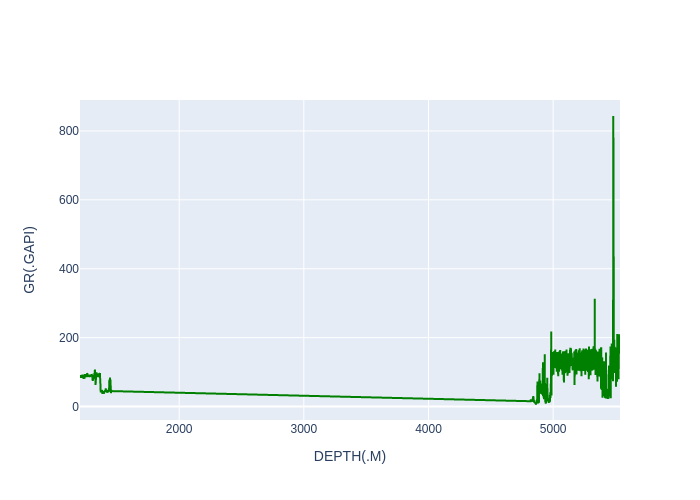

In [23]:
# Gamma ray plot

fig = go.Figure(data=go.Scatter(x=df1['DEPT'], y=df1['GR'], marker_color='green' ) )
fig.update_layout(xaxis_title='DEPTH(.M)', yaxis_title='GR(.GAPI)')
fig.show('png')

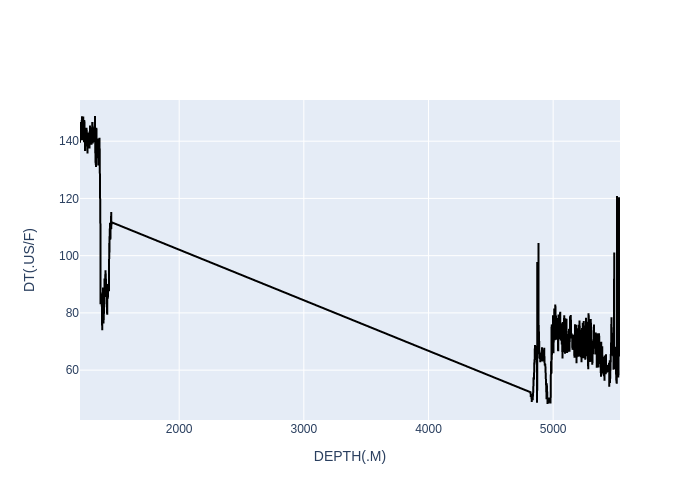

In [24]:
# Sonic

fig = go.Figure(data=go.Scatter(x=df1['DEPT'], y=df1['DT'], marker_color='black'))
fig.update_layout(xaxis_title='DEPTH(.M)', yaxis_title='DT(.US/F)')
fig.show('png')

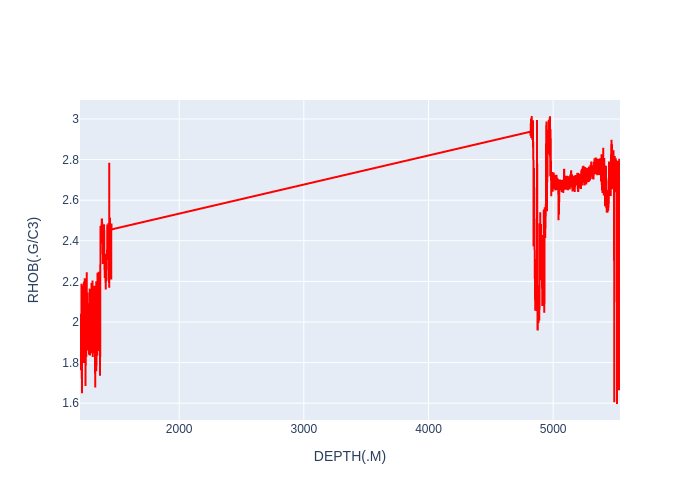

In [25]:
# Bulk density

fig = go.Figure(data=go.Scatter(x=df1['DEPT'], y=df1['RHOB'], marker_color='red'))
fig.update_layout(xaxis_title='DEPTH(.M)', yaxis_title='RHOB(.G/C3)')
fig.show('png')

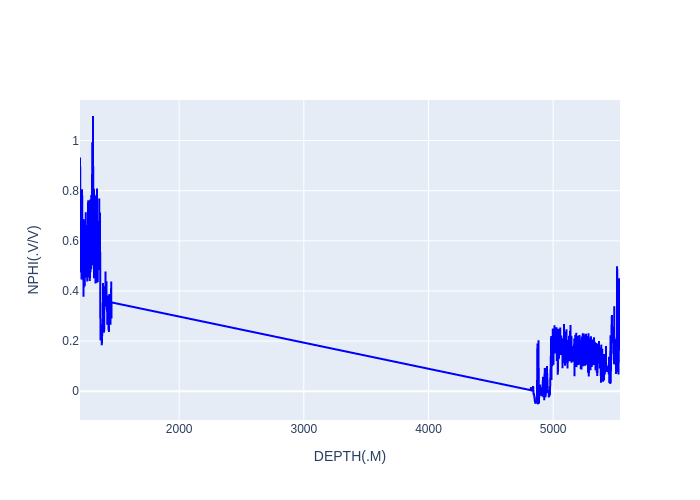

In [26]:
# Neutron pulse Hydrogen

fig = go.Figure(data=go.Scatter(x=df1['DEPT'], y=df1['NPHI'], marker_color='blue'))
fig.update_layout(xaxis_title='DEPTH(.M)', yaxis_title='NPHI(.V/V)')
fig.show('png')

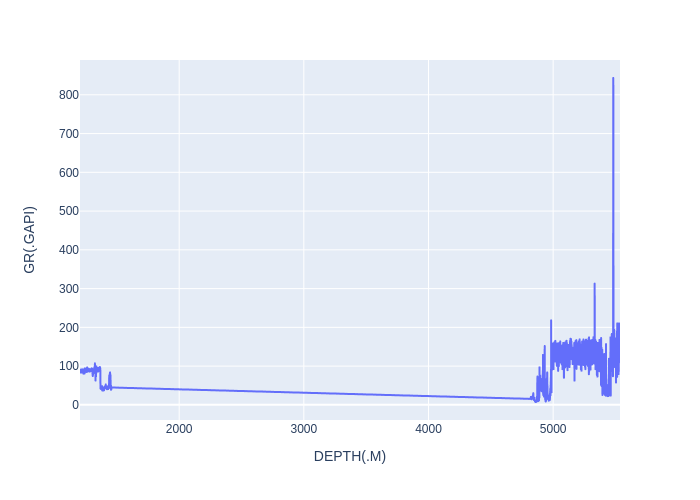

In [27]:
fig = px.line(df1, x='DEPT', y='GR')
fig.update_layout(xaxis_title='DEPTH(.M)', yaxis_title='GR(.GAPI)')
fig.show('png')

# Plots with axis ranges selection

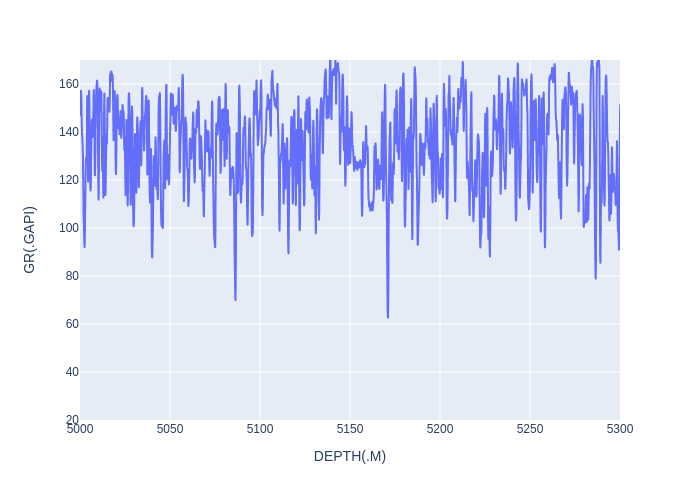

In [28]:
fig = px.line(df1, x='DEPT', y='GR', range_x=[5000, 5300], range_y=[20, 170])
fig.update_layout(xaxis_title='DEPTH(.M)', yaxis_title='GR(.GAPI)')
fig.show('png')

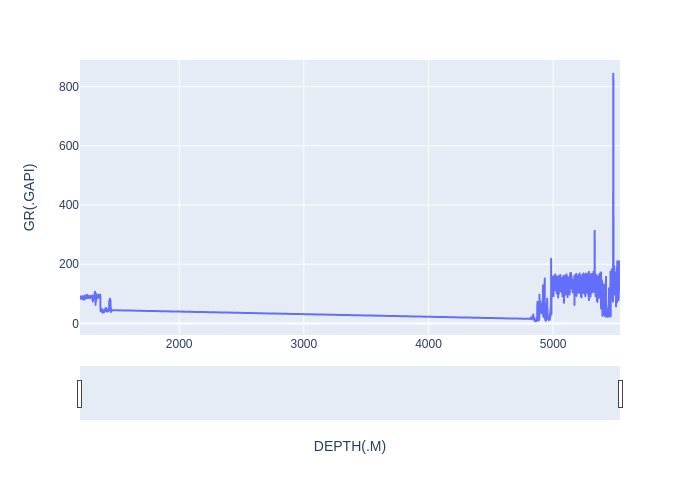

In [29]:
fig = px.line(df1, x='DEPT', y='GR')
fig.update_layout(xaxis_title='DEPTH(.M)', yaxis_title='GR(.GAPI)')
fig.update_xaxes(rangeslider_visible=True)
fig.show('png')

# Subplots

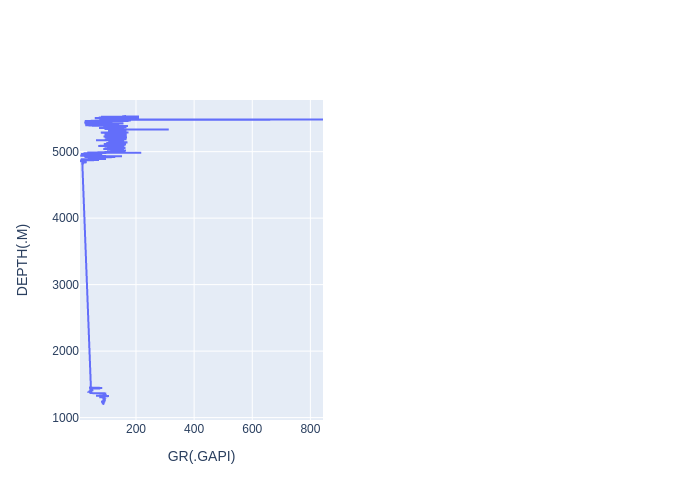

In [30]:
fig= make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=df1['GR'], y=df1['DEPT']), row=1, col=1)
fig.update_layout(xaxis_title='GR(.GAPI)',yaxis_title='DEPTH(.M)')
fig.show('png')

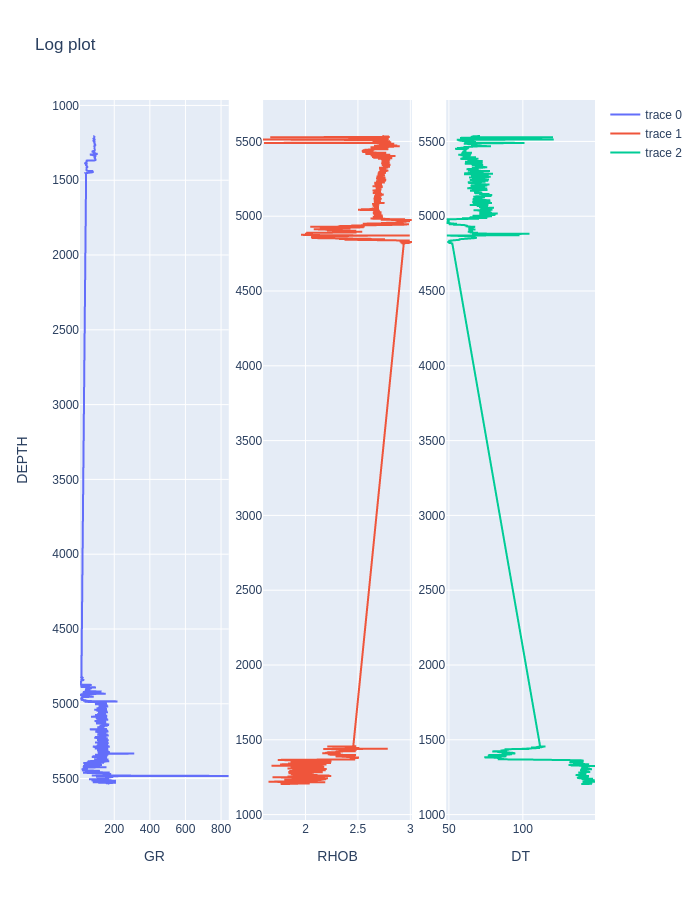

In [31]:
# Gamma ray, bulk density, sonic

fig = make_subplots(rows=1, cols=3, shared_xaxes=True)
fig.add_trace( go.Scatter(x=df1['GR'],   y=df1['DEPT'] ), row=1, col=1)
fig.add_trace( go.Scatter(x=df1['RHOB'], y=df1['DEPT'] ), row=1, col=2)
fig.add_trace( go.Scatter(x=df1['DT'],   y=df1['DEPT'] ), row=1, col=3)

fig.update_xaxes(title_text='GR',   row=1, col=1)
fig.update_xaxes(title_text='RHOB', row=1, col=2)
fig.update_xaxes(title_text='DT',    row=1, col=3)

fig.update_yaxes(title_text='DEPTH', row=1, col=1, autorange='reversed')

fig.update_layout(title_text='Log plot', height=900)


fig.show('png')